In [1]:
from urllib.request import urlopen

import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

from mplsoccer import Pitch, FontManager, add_image

In [2]:
URL = 'https://fbref.com/en/share/SMl1q'
df = pd.read_html(URL)[0]
# select a subset of the columns (Squad and pressure columns)
df = df[['Unnamed: 0_level_0', 'Pressures']].copy()
df.columns = df.columns.droplevel()  # drop the top-level of the multi-index

In [3]:
pressure_cols = ['Def 3rd', 'Mid 3rd', 'Att 3rd']
df_total = pd.DataFrame(df[pressure_cols].sum())
df_total.columns = ['total']
df_total = df_total.T
df_total = df_total.divide(df_total.sum(axis=1), axis=0) * 100

In [4]:
df[pressure_cols] = df[pressure_cols].divide(df[pressure_cols].sum(axis=1), axis=0) * 100.
df.sort_values(['Att 3rd', 'Def 3rd'], ascending=[True, False], inplace=True)
df['Squad'] = df['Squad'].str.split(' ', expand=True)[1]

In [5]:
df1 = df[(df['Squad'] == 'Switzerland')|(df['Squad'] == 'Spain')|(df['Squad'] == 'Belgium')|(df['Squad'] == 'Italy')]
df1.sort_values(by='Squad')

,Squad,Press,Succ,%,Def 3rd,Mid 3rd,Att 3rd
1,Belgium,486,103,21.2,34.773663,42.386831,22.839506
10,Italy,630,166,26.3,25.238095,44.603175,30.158730
18,Spain,528,202,38.3,21.212121,51.136364,27.651515
20,Switzerland,684,163,23.8,35.233918,41.812865,22.953216


In [6]:
#get statsbomb logo and font
LOGO_URL = 'https://raw.githubusercontent.com/statsbomb/open-data/master/img/statsbomb-logo.jpg'
sb_logo = Image.open(urlopen(LOGO_URL))

# a FontManager object for using a google font (default Robotto)
fm = FontManager()
# path effects
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

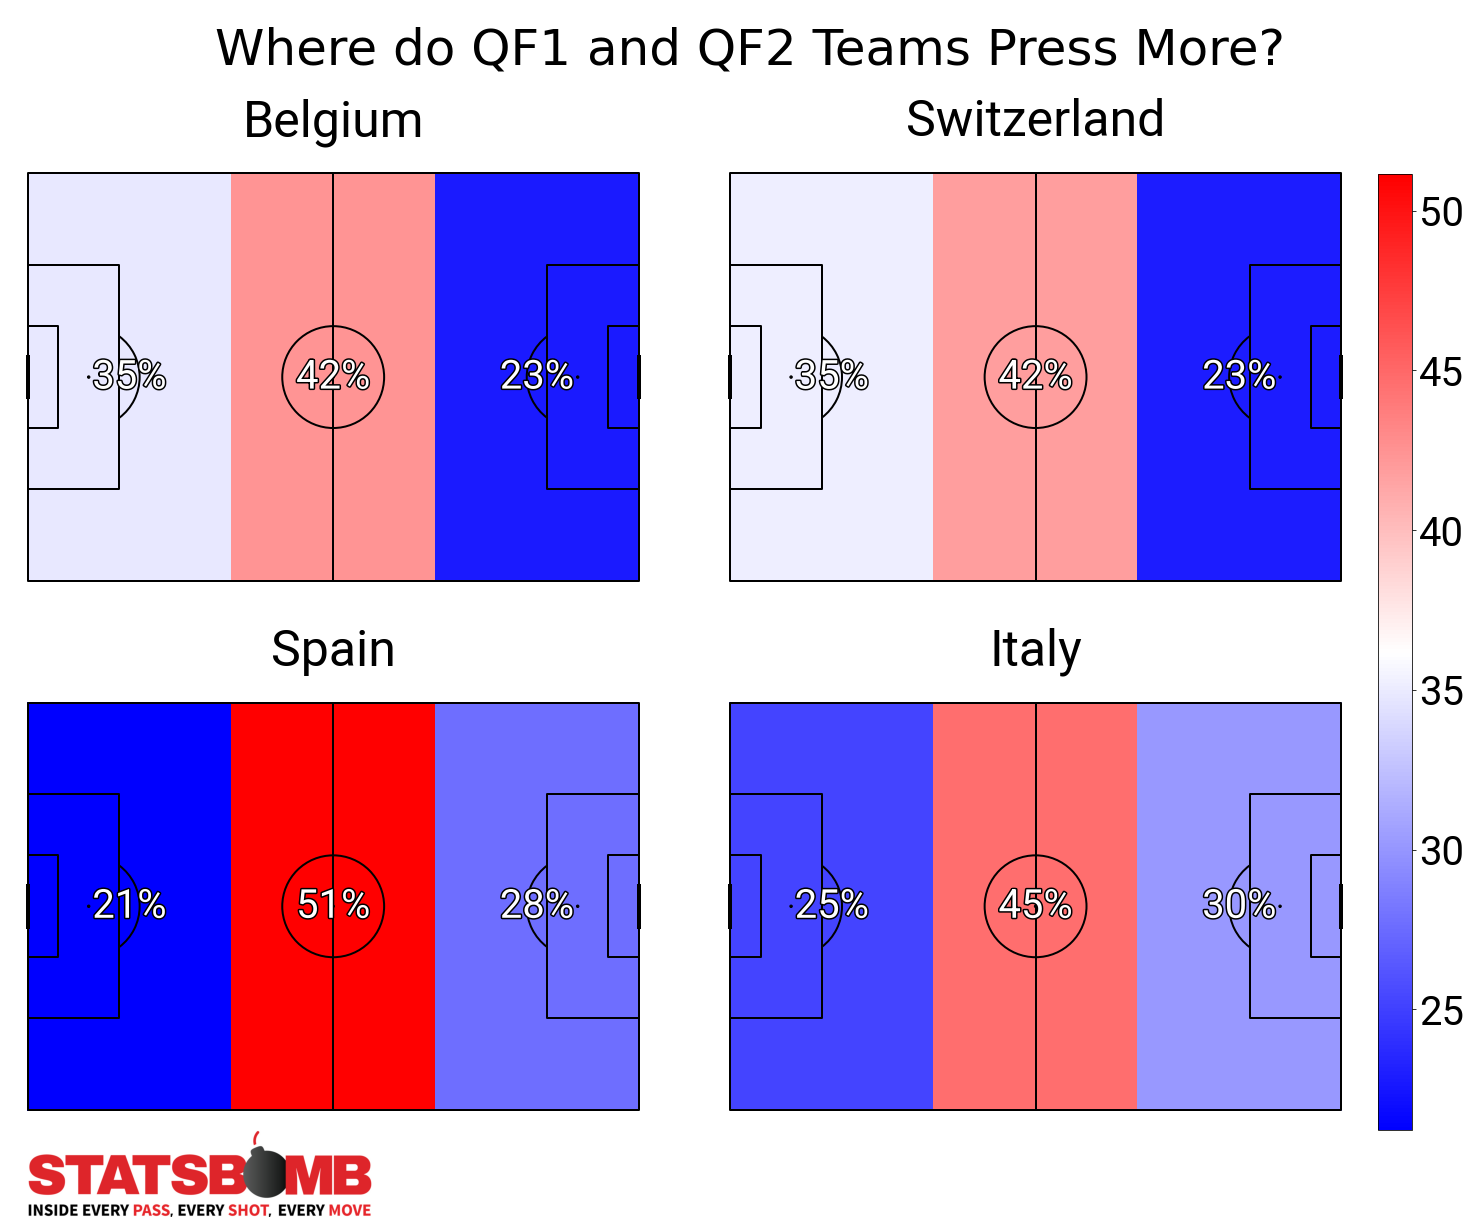

In [28]:
# setup a mplsoccer pitch
pitch = Pitch(line_zorder=2, line_color='black', pad_top=10)

# mplsoccer calculates the binned statistics usually from raw locations, such as pressure events
# for this example we will create a binned statistic dividing
# the pitch into thirds for one point (0, 0)
# we will fill this in a loop later with each team's statistics from the dataframe
bin_statistic = pitch.bin_statistic([0], [0], statistic='count', bins=(3, 1))

GRID_HEIGHT = 0.7
CBAR_WIDTH = 0.02
fig, axs = pitch.grid(nrows=2, ncols=2, figheight=20,
                      # leaves some space on the right hand side for the colorbar
                      grid_width=0.80, left=0.025,
                      endnote_height=0.06, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_space=0.02, title_height=0.06, grid_height=GRID_HEIGHT)
fig.set_facecolor('white')

teams = df1['Squad'].values
vmin = df1[pressure_cols].min().min()  # we normalise the heatmaps with the min / max values
vmax = df1[pressure_cols].max().max()
for i, ax in enumerate(axs['pitch'].flat[:len(teams)]):
    # the top of the StatsBomb pitch is zero
    # plot the title half way between zero and -20 (the top padding)
    ax.text(60, -10, teams[i],
            ha='center', va='center', fontsize=50,
            fontproperties=fm.prop)

    # fill in the bin statistics from df and plot the heatmap
    bin_statistic['statistic'] = df1.loc[df.Squad == teams[i], pressure_cols].values
    heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='bwr', vmin=vmin, vmax=vmax)
    annotate = pitch.label_heatmap(bin_statistic, color='white', fontproperties=fm.prop,
                                   path_effects=path_eff, fontsize=40, ax=ax,
                                   str_format='{0:.0f}%', ha='center', va='center')

# if its the Bundesliga remove the two spare pitches
if len(teams) == 5:
    for ax in axs['pitch'][-2, 3:]:
        ax.remove()

# add cbar axes
cbar_bottom = axs['pitch'][-1, 0].get_position().y0
cbar_left = axs['pitch'][0, -1].get_position().x1 + 0.01
ax_cbar = fig.add_axes((cbar_left, cbar_bottom, CBAR_WIDTH,
                        # take a little bit off the height because of padding
                        GRID_HEIGHT - 0.036))
cbar = plt.colorbar(heatmap, cax=ax_cbar)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(fm.prop)
    label.set_fontsize(40)

# title and endnote
add_image(sb_logo, fig,
          left=axs['endnote'].get_position().x0,
          bottom=axs['endnote'].get_position().y0,
          height=axs['endnote'].get_position().height)
title = axs['title'].text(0.55, 0.5, 'Where do QF1 and QF2 Teams Press More?',
                          ha='center', va='center', fontsize=50)
plt.savefig('QF1 and QF2')

In [29]:
df2 = df[(df['Squad'] == 'Czech')|(df['Squad'] == 'Denmark')|(df['Squad'] == 'Ukraine')|(df['Squad'] == 'England')]
df2.sort_values(by='Squad')

,Squad,Press,Succ,%,Def 3rd,Mid 3rd,Att 3rd
3,Czech,649,175,27.0,31.741140,45.916795,22.342065
4,Denmark,403,142,35.2,23.325062,48.387097,28.287841
5,England,592,152,25.7,26.520270,48.648649,24.831081
22,Ukraine,645,191,29.6,40.155039,43.875969,15.968992


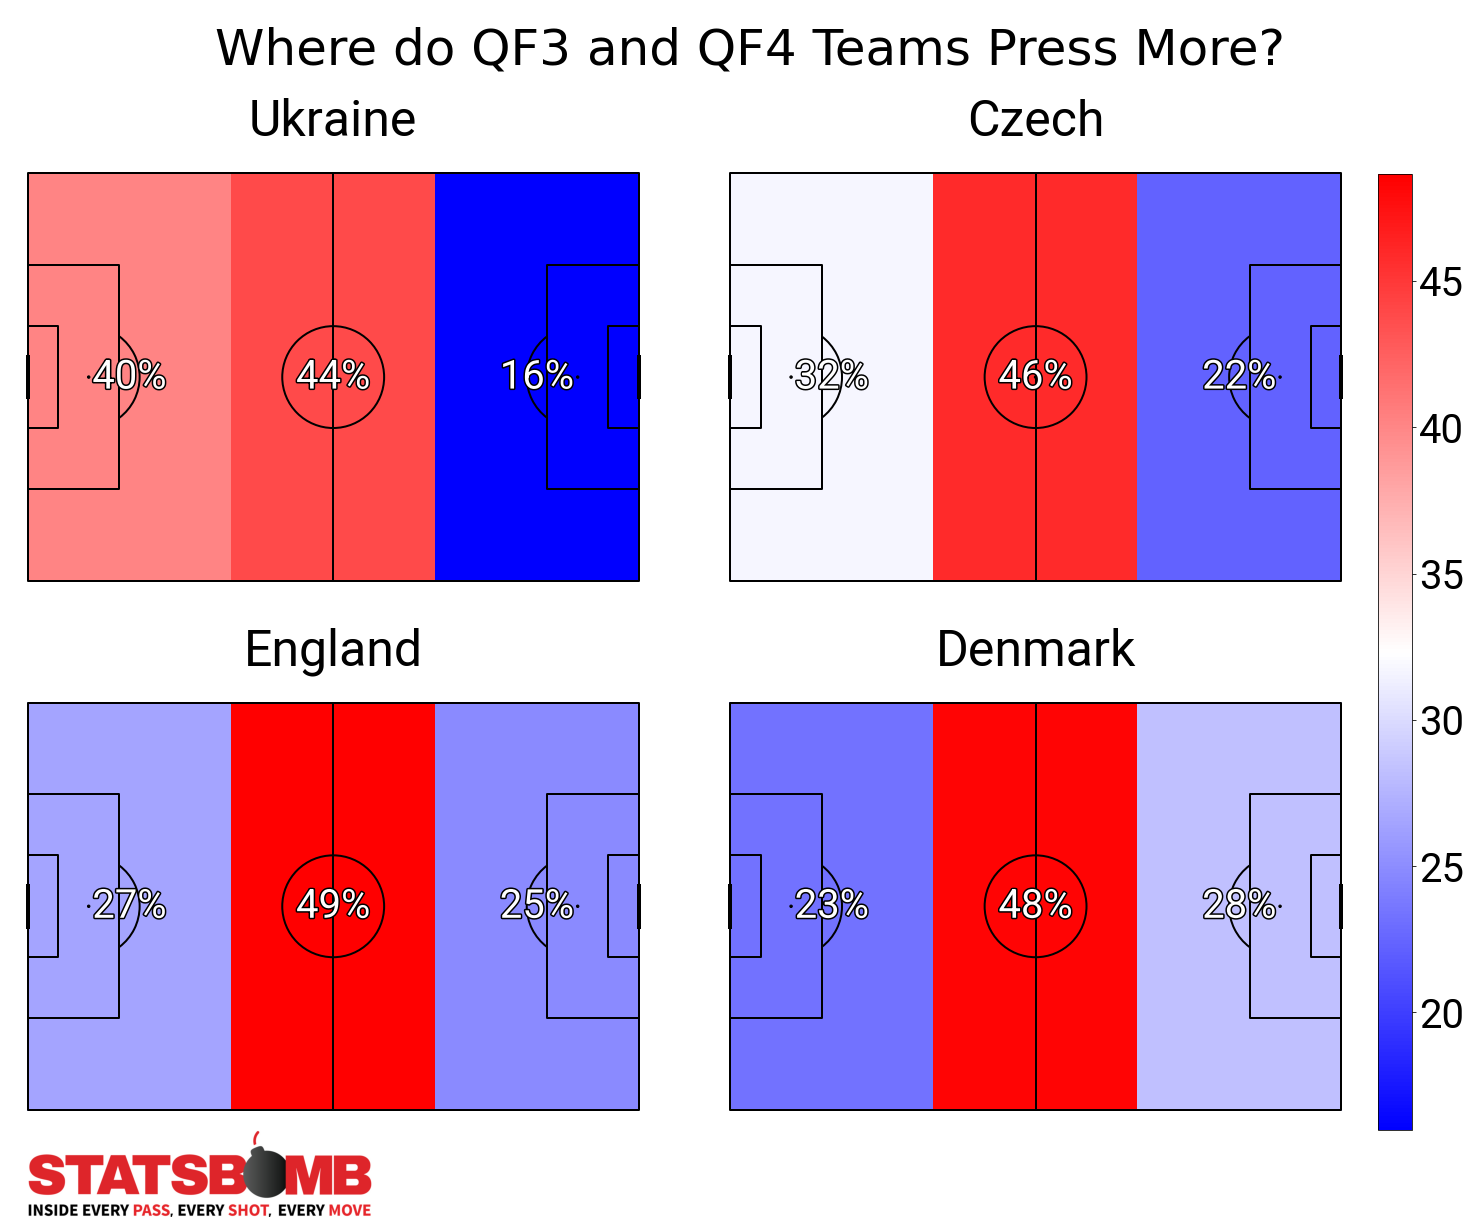

In [30]:
# setup a mplsoccer pitch
pitch = Pitch(line_zorder=2, line_color='black', pad_top=10)

# mplsoccer calculates the binned statistics usually from raw locations, such as pressure events
# for this example we will create a binned statistic dividing
# the pitch into thirds for one point (0, 0)
# we will fill this in a loop later with each team's statistics from the dataframe
bin_statistic = pitch.bin_statistic([0], [0], statistic='count', bins=(3, 1))

GRID_HEIGHT = 0.7
CBAR_WIDTH = 0.02
fig, axs = pitch.grid(nrows=2, ncols=2, figheight=20,
                      # leaves some space on the right hand side for the colorbar
                      grid_width=0.80, left=0.025,
                      endnote_height=0.06, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_space=0.02, title_height=0.06, grid_height=GRID_HEIGHT)
fig.set_facecolor('white')

teams = df2['Squad'].values
vmin = df2[pressure_cols].min().min()  # we normalise the heatmaps with the min / max values
vmax = df2[pressure_cols].max().max()
for i, ax in enumerate(axs['pitch'].flat[:len(teams)]):
    # the top of the StatsBomb pitch is zero
    # plot the title half way between zero and -20 (the top padding)
    ax.text(60, -10, teams[i],
            ha='center', va='center', fontsize=50,
            fontproperties=fm.prop)

    # fill in the bin statistics from df and plot the heatmap
    bin_statistic['statistic'] = df2.loc[df.Squad == teams[i], pressure_cols].values
    heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='bwr', vmin=vmin, vmax=vmax)
    annotate = pitch.label_heatmap(bin_statistic, color='white', fontproperties=fm.prop,
                                   path_effects=path_eff, fontsize=40, ax=ax,
                                   str_format='{0:.0f}%', ha='center', va='center')

# if its the Bundesliga remove the two spare pitches
if len(teams) == 5:
    for ax in axs['pitch'][-2, 3:]:
        ax.remove()

# add cbar axes
cbar_bottom = axs['pitch'][-1, 0].get_position().y0
cbar_left = axs['pitch'][0, -1].get_position().x1 + 0.01
ax_cbar = fig.add_axes((cbar_left, cbar_bottom, CBAR_WIDTH,
                        # take a little bit off the height because of padding
                        GRID_HEIGHT - 0.036))
cbar = plt.colorbar(heatmap, cax=ax_cbar)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(fm.prop)
    label.set_fontsize(40)

# title and endnote
add_image(sb_logo, fig,
          left=axs['endnote'].get_position().x0,
          bottom=axs['endnote'].get_position().y0,
          height=axs['endnote'].get_position().height)
title = axs['title'].text(0.55, 0.5, 'Where do QF3 and QF4 Teams Press More?',
                          ha='center', va='center', fontsize=50)
plt.savefig('QF3 and QF4')